### Setting Up ATU drop data 

In [1]:
import pandas as pd
import numpy as np
import glob

dir_path = "C:\\Users\\admin-magstadt\\Desktop\\Data_3_31_2023\\shortWAGL\\"
filenames = glob.glob(dir_path + "*.csv")

data = []

for filename in filenames:
    num_rows = sum(1 for line in open(filename))
    if num_rows < 26:
        #print(f"Skipping {filename}: less than 25 rows")
        continue
    df = pd.read_csv(filename, usecols=[4,8,21], nrows=25, skiprows=num_rows-26)
    arr = df.values.astype(float)
    data.append(arr)

if len(data) == 0:
    print("No data found")
else:
    array1 = np.stack(data, axis=0)
    print(array1.shape)


(574, 25, 3)


In [4]:
import pandas as pd
import numpy as np
import glob

dir_path = "C:\\Users\\admin-magstadt\\Desktop\\forMatt\\"
filenames = glob.glob(dir_path + "*.csv")

data = []

for filename in filenames:
    num_rows = sum(1 for line in open(filename))
    if num_rows < 26:
        #print(f"Skipping {filename}: less than 25 rows")
        continue
    df = pd.read_csv(filename, usecols=[4,8,21], nrows=25, skiprows=num_rows-26)
    arr = df.values.astype(float)
    data.append(arr)

if len(data) == 0:
    print("No data found")
else:
    array1 = np.stack(data, axis=0)
    print(array1.shape)



(1, 25, 3)


array([[[ 74.39721155, -10.07872   , 121.25387695],
        [ 74.09601063, -12.67968   , 105.8172876 ],
        [ 73.92257765,  -5.52704   ,  84.6509668 ],
        [ 74.05492408,  -3.90144   ,  98.5180835 ],
        [ 73.07278184,  -2.60096   , 109.01062744],
        [ 72.52748208,  -4.55168   , 116.57337158],
        [ 71.9927572 ,  -6.17728   , 124.3626123 ],
        [ 71.28716424,  -7.47776   , 141.16474121],
        [ 69.43469554,   0.97536   , 126.27179199],
        [ 68.46938493,   0.32512   , 143.97967773],
        [ 67.76615985,  -2.27584   , 131.63586182],
        [ 67.95725405,   1.6256    , 127.20660645],
        [ 67.95725405,   0.32512   ,  87.61401123],
        [ 68.21186021,   2.92608   ,  48.73943359],
        [ 68.72979541,  -2.60096   ,  48.9740625 ],
        [ 68.28747561,  -2.92608   ,  33.16620117],
        [ 69.52801539,  10.72896   ,  26.58045166],
        [ 70.50886213,   7.80288   ,  41.68513184],
        [ 71.4947612 ,   2.27584   ,  56.84406738],
        [ 72

### Setting Up ATU NON-drop data 

In [33]:
import pandas as pd
import numpy as np
import glob

dir_path = "C:\\Users\\admin-magstadt\\Desktop\\Data_3_31_2023\\longWAGL\\"
filenames = glob.glob(dir_path + "*.csv")

data = []

for filename in filenames:
    num_rows = sum(1 for line in open(filename))
    if num_rows < 26:
        #print(f"Skipping {filename}: less than 25 rows")
        continue
    df = pd.read_csv(filename, usecols=[4,8,21], nrows=25, skiprows=num_rows-26)
    arr = df.values.astype(float)
    data.append(arr)

if len(data) == 0:
    print("No data found")
else:
    array2 = np.stack(data, axis=0)
    print(array2.shape)

(662, 25, 3)


In [34]:
combined_array = np.concatenate((array1, array2), axis=0)
combined_array.shape



(1236, 25, 3)

In [36]:
weather_condition = np.concatenate((np.ones(array1.shape[0]), np.zeros(array2.shape[0])))
weather_condition
#weather_condition = weather_condition.astype(int)

# Preprocess data (normalize to have zero mean and unit variance)
mean = np.mean(weather_data)
std = np.std(weather_data)
weather_data = (weather_data - mean) / std

train_data, test_data, train_labels, test_labels = train_test_split(combined_array, weather_condition, test_size=0.3, random_state=5545)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=5545)


In [37]:
# Define CNN architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(25, 3)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=25, batch_size=4)

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/25
152/152 [==============================] - 2s 5ms/step - loss: 5.5341 - accuracy: 0.7554 - val_loss: 12.4660 - val_accuracy: 0.7538
Epoch 2/25
152/152 [==============================] - 0s 3ms/step - loss: 4.3668 - accuracy: 0.7537 - val_loss: 2.7069 - val_accuracy: 0.7577
Epoch 3/25
152/152 [==============================] - 0s 3ms/step - loss: 1.4243 - accuracy: 0.7901 - val_loss: 2.6939 - val_accuracy: 0.6923
Epoch 4/25
152/152 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.8231 - val_loss: 1.3363 - val_accuracy: 0.7808
Epoch 5/25
152/152 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.8066 - val_loss: 4.9070 - val_accuracy: 0.7192
Epoch 6/25
152/152 [==============================] - 0s 3ms/step - loss: 0.9931 - accuracy: 0.8215 - val_loss: 1.5762 - val_accuracy: 0.8462
Epoch 7/25
152/152 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.8645 - val_loss: 1.7161 - val_accuracy: 0.8038
Epoch

12/12 [==============================] - 0s 2ms/step


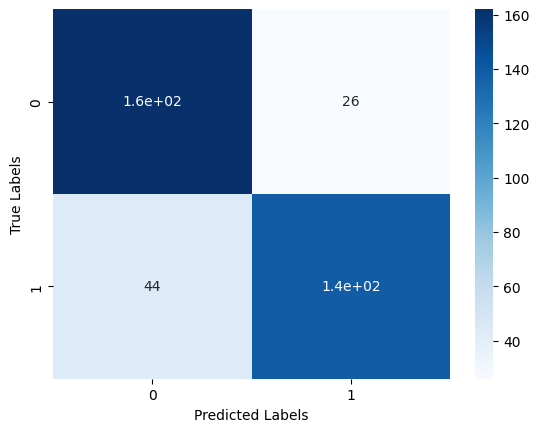

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted labels for the test set
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [39]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test set
y_pred_prob = model.predict(test_data)

# Calculate AUC score
auc = roc_auc_score(test_labels, y_pred_prob)

print('AUC:', auc)


12/12 [==============================] - 0s 2ms/step
AUC: 0.8753051970701082


12/12 [==============================] - 0s 2ms/step


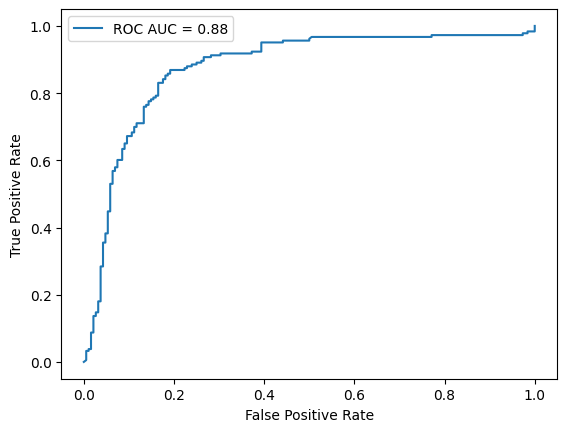

In [41]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the test set
y_pred_prob = model.predict(test_data)

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)

# Calculate the ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split


### ANN modeling

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Define input data (24 hours of weather measurements)
#weather_data = np.random.rand(1000, 24, 4)  # 1000 samples, 24 time steps, 5 features
weather_data = combined_array

# Define output data (weather condition at the next time step)
#weather_condition = np.random.randint(0, 2, size=(1000, 1))  # 0 = not sunny, 1 = sunny
#weather_condition = np.array([1,1,0,0,1,1,1,0,0])
#weather_condition = np.random.choice([0, 1], size=176, p=[0.9, 0.1])
weather_condition = np.concatenate((np.ones(combined_array_DROP.shape[0]), np.zeros(combined_array_noDROP.shape[0])))#, np.random.choice([0, 1], size=176-92-92, p=[0.9, 0.1])))
#weather_condition = np.random.randint(0, 1, size=(184, 1))  # 0 = not sunny, 1 = sunny


#weather_condition = weather_condition.astype(int)

# Preprocess data (normalize to have zero mean and unit variance)
mean = np.mean(weather_data)
std = np.std(weather_data)
weather_data = (weather_data - mean) / std

train_data, test_data, train_labels, test_labels = train_test_split(weather_data, weather_condition, test_size=0.3, random_state=555)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=555)


#Split data into training, validation, and test sets
#train_data = np.array(weather_data[:40])
#train_labels = np.array(weather_condition[:40])
#val_data = np.array(weather_data[40:70])
#val_labels = np.array(weather_condition[40:70])
#test_data = np.array(weather_data[70:176])
#test_labels = np.array(weather_condition[70:176])

# import numpy as np

# def split_data(data, labels, train_ratio, val_ratio, test_ratio):
#     assert train_ratio + val_ratio + test_ratio == 1.0, "Split ratios must add up to 1.0"
    
#     # Calculate number of samples for each split
#     num_samples = len(data)
#     num_train = int(num_samples * train_ratio)
#     num_val = int(num_samples * val_ratio)
#     num_test = num_samples - num_train - num_val
    
#     # Shuffle the data and labels
#     idx = np.random.permutation(num_samples)
#     data = data[idx]
#     labels = labels[idx]
    
#     # Split the data and labels
#     train_data = data[:num_train]
#     train_labels = labels[:num_train]
#     val_data = data[num_train:num_train+num_val]
#     val_labels = labels[num_train:num_train+num_val]
#     test_data = data[num_train+num_val:]
#     test_labels = labels[num_train+num_val:]
    
#     return train_data, train_labels, val_data, val_labels, test_data, test_labels
# train_data, train_labels, val_data, val_labels, test_data, test_labels = split_data(weather_data, weather_condition, 0.4, 0.3, 0.3)

##

# Define CNN architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(25, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=25, batch_size=4)

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

NameError: name 'combined_array_DROP' is not defined

In [17]:
# import pandas as pd
# import numpy as np
# import glob
# # filenames = ["C:\\Users\\magst\\Desktop\\adsboutputs\\N130CG_2019_142_22_22_42.txt", 
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_226_23_32_07.txt", 
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_227_00_32_58.txt",
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N130CG_2019_142_22_22_42.txt", 
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_226_23_32_07.txt", 
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_227_00_32_58.txt",
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N130CG_2019_142_22_22_42.txt", 
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_226_23_32_07.txt", 
# #              "C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_227_00_32_58.txt"]
# # create a list of file paths to all CSV files in a directory
# #dir_path = "C:\\Users\\magst\\Desktop\\Drops_3_3_2023\\dropsamplesCSV\\"
# #dir_path = "C:\\Users\\admin-magstadt\\Desktop\\Data_3_31_2023\\"
# dir_path = "C:\\Users\\admin-magstadt\\Desktop\\Data_3_31_2023\\shortWAGL\\"

# filenames = glob.glob(dir_path + "*.csv")#[:92] 
# #filenames.pop(151)
# #filenames.pop(91)
# #filenames.pop(92)
# #filenames.pop(96)
# #filenames.pop(93)

# # initialize empty list to store data
# data = []

# # loop over the list of filenames
# for filename in filenames:
#     # read the file as a DataFrame, selecting only the desired columns
#     #df = pd.read_csv(filename,usecols=[4, 5, 6], nrows=29)#, usecols=[2, 3, 6], delim_whitespace=True, header=None, nrows=24*5)
#     num_rows = sum(1 for line in open(filename))
#     if num_rows < 24:
#         print(f"Skipping {filename}: less than 25 rows")
#         continue

#     # Read the last 29 samples from the file
#     #df = pd.read_csv(filename, usecols=[7], skiprows=range(1, num_rows-25), nrows=25)
    
#     df = pd.read_csv(filename, usecols=[5,7], nrows=25, skiprows=num_rows-26)#, usecols=['velocity', 'vertrate'])#, usecols=[2, 3, 6], delim_whitespace=True, header=None, nrows=24*5)
#     #print(df.columns)
#     #print(len(df))
#     # convert the DataFrame to a 2D NumPy array of floats
#     arr = df.values.astype(float)
#     # add the array to the list of data
#     data.append(arr)

# # stack the data into a 3D array of shape (3, 24, 3)
# array1 = np.stack(data, axis=0)

# # view the shape of the array
# print(array1.shape)
# #df = pd.read_csv("C:\\Users\\magst\\Desktop\\adsboutputs\\N130CG_2019_142_22_22_42.txt",usecols=[4, 5, 6])#, usecols=[2, 3, 6], delim_whitespace=True, header=None, nrows=24*5)
# #df
# # import pandas as pd
# # arr= pd.read_csv("C:\\Users\\magst\\Desktop\\adsboutputs\\N137CG_2020_227_00_32_58.txt")
# # arr.shape
# #array1